## Build Recommendation System from Scratch

#### Good book : https://epdf.pub/recommender-systems-an-introduction.html

<img src="img/reco1.JPG">

3 types:

1. Demographic Filtering
    * Generalized Recommendations
    * No specific reco as per user
    
    
    
2. Content Based Filtering

<img src='https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/06/Screenshot-from-2018-06-21-10-57-38.png'>


3. Collaborative Filtering


<img src='https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/05/0o0zVW2O6Rv-LI5Mu1.png'>

In [1]:
import warnings
warnings.filterwarnings("ignore")

#### Import Libraries

In [2]:
import pandas as pd
import numpy as np

In [3]:
df1 = pd.read_csv('datasets/tmdb_5000_credits.csv')
df2 = pd.read_csv('datasets/tmdb_5000_movies.csv')

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
movie_id    4803 non-null int64
title       4803 non-null object
cast        4803 non-null object
crew        4803 non-null object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [6]:
df1.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [8]:
df2.drop('title',axis=1,inplace=True)

In [9]:
df1.columns = ['id','title','cast','crew']

df = df2.merge(df1,on='id')

In [10]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,title,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### Demographic Filtering Model


* We need to create some score or metric to rate the movie.


* Calculate score of every movie


* Sort the data according to scores and recommend best score movies to the users.


* Formula:

<img src="img/reco2.JPG">

The formula for calculating the Top Rated 250 Titles gives a true Bayesian estimate:


**weighted rating (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C** where:


* R = average for the movie (mean) = (Rating)


* v = number of votes for the movie = (votes)


* m = minimum votes required to be listed in the Top 250 (currently 25000)


* C = the mean vote across the whole report (currently 7.0)

In [11]:
C = df['vote_average'].mean()
C

6.092171559442011

In [12]:
m = df['vote_count'].quantile(0.85)
m

1300.6999999999998

In [13]:
dff = df.copy().loc[df['vote_count']>=m]

dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 721 entries, 0 to 4602
Data columns (total 22 columns):
budget                  721 non-null int64
genres                  721 non-null object
homepage                480 non-null object
id                      721 non-null int64
keywords                721 non-null object
original_language       721 non-null object
original_title          721 non-null object
overview                721 non-null object
popularity              721 non-null float64
production_companies    721 non-null object
production_countries    721 non-null object
release_date            721 non-null object
revenue                 721 non-null int64
runtime                 721 non-null float64
spoken_languages        721 non-null object
status                  721 non-null object
tagline                 709 non-null object
vote_average            721 non-null float64
vote_count              721 non-null int64
title                   721 non-null object
cast           

In [14]:
def weighted_rating(x, m=m, C=C):
    V = x['vote_count']
    R = x['vote_average']
    
    return (R* (V/(V+m))) + (C * (m/(V+m)))

In [15]:
dff['Score'] = df.apply(weighted_rating,axis=1)

In [16]:
dff.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,vote_average,vote_count,title,cast,crew,Score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.090010
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.718859
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.253124
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.411541
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.097027


In [17]:
df = dff.sort_values('Score',ascending=False)

df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,vote_average,vote_count,title,cast,crew,Score
1881,25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,278,"[{""id"": 378, ""name"": ""prison""}, {""id"": 417, ""n...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,"[{""name"": ""Castle Rock Entertainment"", ""id"": 97}]",...,142.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Fear can hold you prisoner. Hope can set you f...,8.5,8205,The Shawshank Redemption,"[{""cast_id"": 3, ""character"": ""Andy Dufresne"", ...","[{""credit_id"": ""52fe4231c3a36847f800b153"", ""de...",8.170528
662,63000000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.foxmovies.com/movies/fight-club,550,"[{""id"": 825, ""name"": ""support group""}, {""id"": ...",en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...",...,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mischief. Mayhem. Soap.,8.3,9413,Fight Club,"[{""cast_id"": 4, ""character"": ""The Narrator"", ""...","[{""credit_id"": ""55731b8192514111610027d7"", ""de...",8.031958
3232,8000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",NaN,680,"[{""id"": 396, ""name"": ""transporter""}, {""id"": 14...",en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",...,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Just because you are a character doesn't mean ...,8.3,8428,Pulp Fiction,"[{""cast_id"": 2, ""character"": ""Vincent Vega"", ""...","[{""credit_id"": ""52fe4269c3a36847f801caa3"", ""de...",8.004820
65,185000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",http://thedarkknight.warnerbros.com/dvdsite/,155,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...",...,152.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Why So Serious?,8.2,12002,The Dark Knight,"[{""cast_id"": 35, ""character"": ""Bruce Wayne"", ""...","[{""credit_id"": ""55a0eb4a925141296b0010f8"", ""de...",7.993903
3337,6000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",http://www.thegodfather.com/,238,"[{""id"": 131, ""name"": ""italy""}, {""id"": 699, ""na...",en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,175.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,An offer you can't refuse.,8.4,5893,The Godfather,"[{""cast_id"": 5, ""character"": ""Don Vito Corleon...","[{""credit_id"": ""52fe422bc3a36847f80093c9"", ""de...",7.982719


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

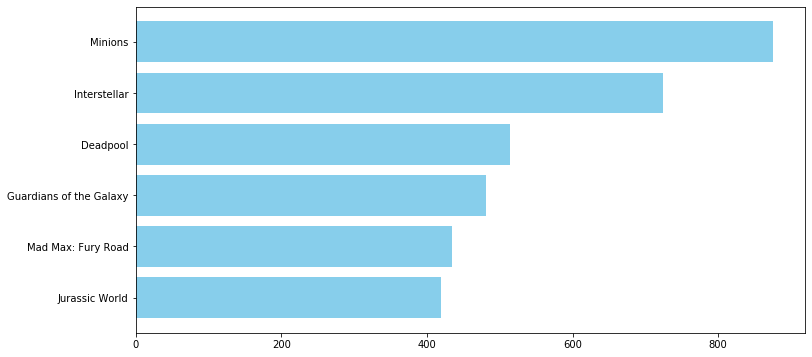

In [19]:
pop = df.sort_values('popularity',ascending=False)

plt.figure(figsize=(12,6))

plt.barh(pop['title'].head(6),pop['popularity'].head(6),align='center',color='skyblue')

plt.gca().invert_yaxis()

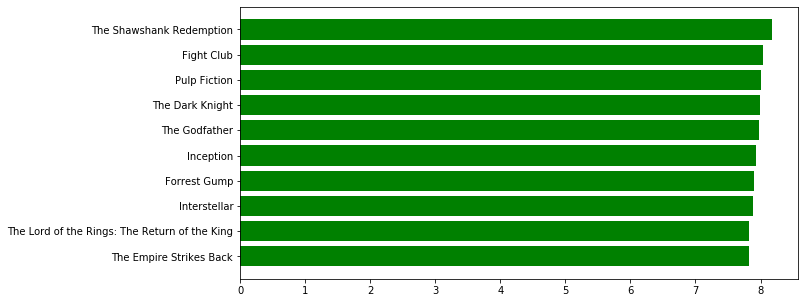

In [20]:
score = df.sort_values('Score',ascending=False)

plt.figure(figsize=(10,5))

plt.barh(score['title'].head(10),score['Score'].head(10),align='center',color='green')

plt.gca().invert_yaxis()

#### Yay ! we created our first recommendation model !!!!

## Move to Content Based Filtering

<img src='img/reco3.jpg'>

In this problem statement we will be using the description and other attributes of the movie to predict its similarity to other movies

In [21]:
df1.columns = ['id','title','cast','crew']

df = df2.merge(df1,on='id')

In [22]:
df['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

### Text vectorization

##### CountVectorizer

# HW
##### TF-IDF Vectorizer - Term Frequency - Inverse Document Frequency 


###### Help us find the overall importance of the word in a set of documents

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

df['overview'] = df['overview'].fillna('')

tfidf_matrix = tfidf.fit_transform(df['overview'])

tfidf_matrix.shape

(4803, 20978)

In [24]:
tfidf_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Now we will be creating a similarity matrix using cosine similarity
# HW
##### Euclidean, Mahanalobis distance, Levenshtein, Cosine... - Read about it

<img src="img/reco4.JPG">

In [25]:
from sklearn.metrics.pairwise import linear_kernel,cosine_similarity

cosine_sim = linear_kernel(tfidf_matrix,tfidf_matrix)

In [26]:
df_sim = pd.DataFrame(cosine_sim)

df_sim.head(10)

,0,1,2,3,4,5,6,7,8,9,...,4793,4794,4795,4796,4797,4798,4799,4800,4801,4802
0,1.000000,0.000000,0.000000,0.024995,0.000000,0.030353,0.000000,0.037581,0.000000,0.000000,...,0.000000,0.000000,0.029175,0.042176,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.000000,1.000000,0.000000,0.000000,0.033369,0.000000,0.000000,0.022676,0.000000,0.000000,...,0.000000,0.000000,0.006895,0.000000,0.000000,0.000000,0.0,0.021605,0.000000,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.030949,0.024830,0.000000,...,0.027695,0.000000,0.000000,0.000000,0.017768,0.000000,0.0,0.014882,0.000000,0.000000
3,0.024995,0.000000,0.000000,1.000000,0.010433,0.005145,0.012601,0.026954,0.020652,0.133740,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.033864,0.042752,0.022692
4,0.000000,0.033369,0.000000,0.010433,1.000000,0.000000,0.009339,0.037407,0.000000,0.017148,...,0.012730,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.006126,0.000000,0.000000
5,0.030353,0.000000,0.000000,0.005145,0.000000,1.000000,0.000000,0.000000,0.000000,0.006209,...,0.000000,0.014866,0.022766,0.022218,0.000000,0.000000,0.0,0.018289,0.005611,0.005690
6,0.000000,0.000000,0.000000,0.012601,0.009339,0.000000,1.000000,0.011881,0.000000,0.017281,...,0.022807,0.000000,0.018983,0.000000,0.000000,0.000000,0.0,0.000000,0.009274,0.005828
7,0.037581,0.022676,0.030949,0.026954,0.037407,0.000000,0.011881,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.008227,0.048475,0.000000,0.011481,0.0,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.024830,0.020652,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.027528,0.0,0.029639,0.035356,0.024628
9,0.000000,0.000000,0.000000,0.133740,0.017148,0.006209,0.017281,0.000000,0.000000,1.000000,...,0.012059,0.013309,0.025619,0.000000,0.000000,0.000000,0.0,0.015648,0.005222,0.005295


We will define a function that takes movie title as input and outputs a list of 10 most similar movies.

In [27]:
indices = pd.Series(df.index,index=df['title'])

In [28]:
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

### Recommendation Function Psuedocode

1. get index of movie title


2. get list of cosine similarities


3. convert it into a list of tuples looking like this >>> (index of movie, similarity score)


4. sort the list basis the similarity score in descending order


5. get top 10 elements of list


6. first element will be the movie itself


7. Show 1:11

In [29]:
def get_recommendations(title, cosine_sim=cosine_sim):
    
    # get index of movie title
    idx = indices[title]
    
    # get list of cosine similarities
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    
    # convert it into a list of tuples looking 
    # like this >>> (index of movie, similarity score)
    # sort the list basis the similarity score in descending order
    sim_scores = sorted(sim_scores,key=lambda x: x[1],reverse=True)
    
    
    # get top 10 elements of list
    sim_scores = sim_scores[1:11]
    
    # get movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    
    # return top 10
    return df['title'].iloc[movie_indices]

In [30]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [31]:
get_recommendations('The Avengers')

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title, dtype: object

In [32]:
get_recommendations('Avatar')

3604                       Apollo 18
2130                    The American
634                       The Matrix
1341            The Inhabited Island
529                 Tears of the Sun
1610                           Hanna
311     The Adventures of Pluto Nash
847                         Semi-Pro
775                        Supernova
2628             Blood and Chocolate
Name: title, dtype: object

In [33]:
df['title'].head(10)

0                                      Avatar
1    Pirates of the Caribbean: At World's End
2                                     Spectre
3                       The Dark Knight Rises
4                                 John Carter
5                                Spider-Man 3
6                                     Tangled
7                     Avengers: Age of Ultron
8      Harry Potter and the Half-Blood Prince
9          Batman v Superman: Dawn of Justice
Name: title, dtype: object

In [34]:
get_recommendations('Harry Potter and the Half-Blood Prince')

114           Harry Potter and the Goblet of Fire
113     Harry Potter and the Order of the Phoenix
191      Harry Potter and the Prisoner of Azkaban
276       Harry Potter and the Chamber of Secrets
501                             The Little Prince
4767                               Run, Hide, Die
197      Harry Potter and the Philosopher's Stone
4133                                        Plush
3015                                   Sinister 2
876                          Domestic Disturbance
Name: title, dtype: object

In [35]:
get_recommendations("Schindler's List")

3285                             Restless
2942                        Woman in Gold
4411                                Proud
2377                      The Railway Man
571                  Inglourious Basterds
3750                     The Great Escape
2052                           Black Book
680                                 U-571
117     Charlie and the Chocolate Factory
1468                         The Fountain
Name: title, dtype: object

### Problems : the recommender system above is too tied up to the overview column and is giving recommendations in a tight space

In [36]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,title,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [37]:
df['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [38]:
df['keywords'][0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [39]:
df['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [40]:
# ast = abstract syntax trees

from ast import literal_eval

features = ['cast','crew','keywords','genres']

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 22 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4803 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null int64
title                   4803 non-null o

In [42]:
for feature in features:
    df[feature] = df[feature].apply(literal_eval)

In [43]:
df['genres'][0]

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [44]:
df['crew'][0]

[{'credit_id': '52fe48009251416c750aca23',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '539c47ecc3a36810e3001f87',
  'department': 'Art',
  'gender': 2,
  'id': 496,
  'job': 'Production Design',
  'name': 'Rick Carter'},
 {'credit_id': '54491c89c3a3680fb4001cf7',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Sound Designer',
  'name': 'Christopher Boyes'},
 {'credit_id': '54491cb70e0a267480001bd0',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Supervising Sound Editor',
  'name': 'Christopher Boyes'},
 {'credit_id': '539c4a4cc3a36810c9002101',
  'department': 'Production',
  'gender': 1,
  'id': 1262,
  'job': 'Casting',
  'name': 'Mali Finn'},
 {'credit_id': '5544ee3b925141499f0008fc',
  'department': 'Sound',
  'gender': 2,
  'id': 1729,
  'job': 'Original Music Composer',
  'name': 'James Horner'},
 {'credit_id': '52fe48009251416c750ac9c3',
  'department': 'Directing',
  

In [45]:
df[features]

,cast,crew,keywords,genres
0,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...","[{'id': 1463, 'name': 'culture clash'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
1,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
3,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
4,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
...,...,...,...,...
4798,"[{'cast_id': 1, 'character': 'El Mariachi', 'c...","[{'credit_id': '52fe44eec3a36847f80b280b', 'de...","[{'id': 5616, 'name': 'united states–mexico ba...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
4799,"[{'cast_id': 1, 'character': 'Buzzy', 'credit_...","[{'credit_id': '52fe487dc3a368484e0fb013', 'de...",[],"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '..."
4800,"[{'cast_id': 8, 'character': 'Oliver O’Toole',...","[{'credit_id': '52fe4df3c3a36847f8275ecf', 'de...","[{'id': 248, 'name': 'date'}, {'id': 699, 'nam...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4801,"[{'cast_id': 3, 'character': 'Sam', 'credit_id...","[{'credit_id': '52fe4ad9c3a368484e16a36b', 'de...",[],[]


In [46]:
df[features].to_csv('features_cbf.csv')

* 3 top actors
* Director
* related genres and plot keywords

#### Extracting Director

In [47]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

#### Top 3 values (actor, genre, crew)

In [48]:
def get_top3(x):
    if isinstance(x,list):
        names = [i['name'] for i in x]
        
        # checking if more than 3 elements
        if len(names)>3:
            names = names[:3]
            
        return names
    return []

In [49]:
df['genres'][0]

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [50]:
df['director'] = df['crew'].apply(get_director)

In [51]:
features = ['cast','genres','keywords']

for feature in features:
    df[feature] = df[feature].apply(get_top3)

In [52]:
df[features]

,cast,genres,keywords
0,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[Action, Adventure, Fantasy]","[culture clash, future, space war]"
1,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island]"
2,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[Action, Adventure, Crime]","[spy, based on novel, secret agent]"
3,"[Christian Bale, Michael Caine, Gary Oldman]","[Action, Crime, Drama]","[dc comics, crime fighter, terrorist]"
4,"[Taylor Kitsch, Lynn Collins, Samantha Morton]","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion]"
...,...,...,...
4798,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...","[Action, Crime, Thriller]","[united states–mexico barrier, legs, arms]"
4799,"[Edward Burns, Kerry Bishé, Marsha Dietlein]","[Comedy, Romance]",[]
4800,"[Eric Mabius, Kristin Booth, Crystal Lowe]","[Comedy, Drama, Romance]","[date, love at first sight, narration]"
4801,"[Daniel Henney, Eliza Coupe, Bill Paxton]",[],[]


In [53]:
def cleanData(x):
    
    if isinstance(x,list):
        return [str.lower(i.replace(' ','')) for i in x]
    else:
        if isinstance(x,str):
            return str.lower(x.replace(' ',''))
        else:
            return []

In [54]:
features = ['director','cast','genres','keywords']
df[features]

for feature in features:
    df[feature] = df[feature].apply(cleanData)

In [55]:
df[features]

,director,cast,genres,keywords
0,jamescameron,"[samworthington, zoesaldana, sigourneyweaver]","[action, adventure, fantasy]","[cultureclash, future, spacewar]"
1,goreverbinski,"[johnnydepp, orlandobloom, keiraknightley]","[adventure, fantasy, action]","[ocean, drugabuse, exoticisland]"
2,sammendes,"[danielcraig, christophwaltz, léaseydoux]","[action, adventure, crime]","[spy, basedonnovel, secretagent]"
3,christophernolan,"[christianbale, michaelcaine, garyoldman]","[action, crime, drama]","[dccomics, crimefighter, terrorist]"
4,andrewstanton,"[taylorkitsch, lynncollins, samanthamorton]","[action, adventure, sciencefiction]","[basedonnovel, mars, medallion]"
...,...,...,...,...
4798,robertrodriguez,"[carlosgallardo, jaimedehoyos, petermarquardt]","[action, crime, thriller]","[unitedstates–mexicobarrier, legs, arms]"
4799,edwardburns,"[edwardburns, kerrybishé, marshadietlein]","[comedy, romance]",[]
4800,scottsmith,"[ericmabius, kristinbooth, crystallowe]","[comedy, drama, romance]","[date, loveatfirstsight, narration]"
4801,danielhsia,"[danielhenney, elizacoupe, billpaxton]",[],[]


In [56]:
def joinKeywords(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])

In [57]:
df.drop(df.index[3660:],inplace=True)

In [58]:
df['joined'] = df.apply(joinKeywords,axis=1)

#### Vectorize

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')

cm = cv.fit_transform(df['joined'])

In [62]:
df['joined'][0]

'cultureclash future spacewar samworthington zoesaldana sigourneyweaver jamescameron action adventure fantasy'

In [63]:
cm.shape

(3660, 8449)

In [64]:
cosine_sim_2 = cosine_similarity(cm,cm)

In [66]:
df_cs_2 = pd.DataFrame(cosine_sim_2)

df_cs_2.head(10)

,0,1,2,3,4,5,6,7,8,9,...,3650,3651,3652,3653,3654,3655,3656,3657,3658,3659
0,1.0,0.3,0.2,0.1,0.2,0.3,0.000000,0.2,0.200000,0.3,...,0.1,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.1
1,0.3,1.0,0.2,0.1,0.2,0.3,0.000000,0.2,0.200000,0.3,...,0.1,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.1
2,0.2,0.2,1.0,0.2,0.3,0.2,0.000000,0.2,0.100000,0.2,...,0.1,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.100000,0.0
3,0.1,0.1,0.2,1.0,0.1,0.1,0.000000,0.1,0.000000,0.2,...,0.2,0.105409,0.000000,0.0,0.111803,0.0,0.000000,0.0,0.100000,0.1
4,0.2,0.2,0.3,0.1,1.0,0.2,0.000000,0.3,0.100000,0.2,...,0.1,0.000000,0.119523,0.0,0.000000,0.0,0.105409,0.0,0.000000,0.0
5,0.3,0.3,0.2,0.1,0.2,1.0,0.000000,0.2,0.200000,0.3,...,0.1,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.1
6,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.210819,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.105409,0.0
7,0.2,0.2,0.2,0.1,0.3,0.2,0.000000,1.0,0.100000,0.3,...,0.1,0.000000,0.119523,0.0,0.000000,0.0,0.105409,0.0,0.000000,0.0
8,0.2,0.2,0.1,0.0,0.1,0.2,0.210819,0.1,1.000000,0.2,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.1
9,0.3,0.3,0.2,0.2,0.2,0.3,0.000000,0.3,0.200000,1.0,...,0.1,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.1


In [67]:
df = df.reset_index()

indices = pd.Series(df.index,index=df['title'])

indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
Fascination                                 3655
Area 51                                     3656
Sleep Tight                                 3657
The Cottage                                 3658
Dead Like Me: Life After Death              3659
Length: 3660, dtype: int64

In [68]:
get_recommendations('Harry Potter and the Half-Blood Prince',cosine_sim_2)

113             Harry Potter and the Order of the Phoenix
114                   Harry Potter and the Goblet of Fire
197              Harry Potter and the Philosopher's Stone
276               Harry Potter and the Chamber of Secrets
191              Harry Potter and the Prisoner of Azkaban
37                             Oz: The Great and Powerful
63      The Chronicles of Narnia: The Lion, the Witch ...
109     The Chronicles of Narnia: The Voyage of the Da...
143                                                   Pan
2294                                        Spirited Away
Name: title, dtype: object


7               Avengers: Age of Ultron


3144                            Plastic


1715                            Timecop


4124                 This Thing of Ours


3311              Thank You for Smoking


3033                      The Corruptor


588     Wall Street: Money Never Sleeps


2136         Team America: World Police


1468                       The Fountain


1286                        Snowpiercer

In [70]:
get_recommendations('The Avengers',cosine_sim_2)

7                  Avengers: Age of Ultron
26              Captain America: Civil War
79                              Iron Man 2
169     Captain America: The First Avenger
174                    The Incredible Hulk
85     Captain America: The Winter Soldier
31                              Iron Man 3
33                   X-Men: The Last Stand
68                                Iron Man
94                 Guardians of the Galaxy
Name: title, dtype: object

### Collaborative Filtering

#### User based collaborative filtering

* Recommend products to a user that another similar user has liked.

###### Issues

* User preferences change over time.


* Similarity matrix is pre-computed so changes in user preferences for the uncovered window will not be accounted for.

<img src="img/reco5.JPG">
<img src="img/reco6.JPG">
<img src="img/reco7.JPG">

### Item based collaborative filtering

* Instead of creating similarity matrix between the users, we'll measure the similarity between the items that **targeted user** has rated.

<img src="img/reco8.jpg">

* **Scalability** : One of the issues in recommender systems is giving real time recommendations. Recommenders are High Throughput and Low Latency systems.


* As # of users (m) and # of products (n) increase, the time complexity will increase. O(m*n)


* Sparse matrix is generatedd


* Recommendation is an optimization problem.

### Solution : Singular Value Decomposition

### Metric : RMSE (the lower the better)

### Library : Surprise

In [72]:
# !conda install -c conda-forge scikit-surprise or pip install surprise

In [73]:
from surprise import Reader, Dataset, SVD

from surprise.model_selection import cross_validate

reader = Reader()

df_ = pd.read_csv('datasets/ratings_small.csv')

In [76]:
data = Dataset.load_from_df(df_[['userId', 'movieId', 'rating']],reader)

algo = SVD()

cross_validate(algo,data,measures=['RMSE','MAE'],cv=5,verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9016  0.8944  0.8849  0.9094  0.8968  0.8974  0.0081  
MAE (testset)     0.6976  0.6883  0.6810  0.6991  0.6890  0.6910  0.0066  
Fit time          4.09    4.02    3.92    3.83    3.69    3.91    0.14    
Test time         0.14    0.12    0.11    0.13    0.10    0.12    0.01    


{'test_rmse': array([0.90155069, 0.89437311, 0.88485256, 0.909417  , 0.89682848]),
 'test_mae': array([0.69755162, 0.68834284, 0.68097465, 0.69913146, 0.6889984 ]),
 'fit_time': (4.09225869178772,
  4.016151666641235,
  3.921318292617798,
  3.8328168392181396,
  3.687896966934204),
 'test_time': (0.13614511489868164,
  0.11810111999511719,
  0.10921287536621094,
  0.13295888900756836,
  0.10308194160461426)}

In [77]:
df_.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [78]:
type(data)

surprise.dataset.DatasetAutoFolds

In [79]:
df_[df_['userId']==1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [80]:
algo.predict(1,302,verbose=True)

user: 1          item: 302        r_ui = None   est = 3.00   {'was_impossible': False}


Prediction(uid=1, iid=302, r_ui=None, est=3.0047847520284985, details={'was_impossible': False})

In [81]:
algo.predict(1,19,verbose=True)

user: 1          item: 19         r_ui = None   est = 2.38   {'was_impossible': False}


Prediction(uid=1, iid=19, r_ui=None, est=2.382665535691675, details={'was_impossible': False})

In [82]:
algo.predict(1,18,verbose=True)

user: 1          item: 18         r_ui = None   est = 2.98   {'was_impossible': False}


Prediction(uid=1, iid=18, r_ui=None, est=2.984370820128508, details={'was_impossible': False})

### Conclusions

1. 3 types of reco engines: 
    a. Demography based
    b. Content based
    c. Collaborative Filtering based
    
    
2. Demography based were pretty elementary.


3. Content based can be improved by increasing the metadata.


4. UBCF and IBCF are used with Content based to create a hybrid approach.


5. This a starter pack for you. Use this code and improve it and apply it on similar problems.

# Great Job!